In [5]:
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt

In [62]:
image = cv.imread('sevenplusthree.png')

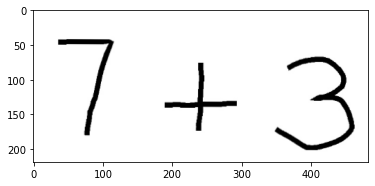

In [63]:
plt.imshow(image)

In [64]:
imgray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

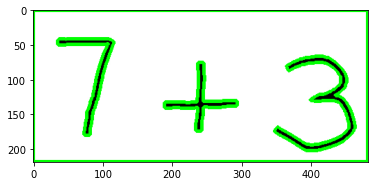

In [65]:
plt.imshow(cv.drawContours(image, contours, -1, (0,255,0), 3))

In [25]:
def find_contours(path):
    img = cv.imread(path)
    imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(imgray, 127, 255, 0)
    return cv.findContours(
        thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [27]:
contours, hierarchy = find_contours('test_eq.jpg')

In [66]:
boundingRects = [cv.boundingRect(contour) for contour in contours]

In [67]:
boundingRects

[(0, 0, 483, 219), (189, 75, 106, 100), (348, 66, 117, 137), (35, 41, 82, 140)]

In [77]:
(x, y, w, h) = boundingRects[3]

In [78]:
rect_img = cv.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 5)

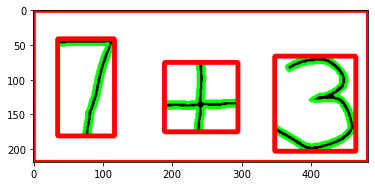

In [79]:
plt.imshow(rect_img)

In [ ]:
def find_unique_contours(image):
    """Finds all contours and chooses ones that best contour characters
    Args:
        image (np.ndarray): np.ndarray representation of the image
    Returns:
        list: list of bounding boxes for filtered contours
    """
    contours, hierarchy = find_contours(image)
    boundingRects = [cv.boundingRect(contour) for contour in contours]

    # If 2 bounding boxes are overlapping, take the bigger one
    for i in range(len(boundingRects)):
        if boundingRects[i] is None:
            continue
        for j in range(i + 1, len(boundingRects)):
            if boundingRects[j] is None:
                continue
            x1, y1, width1, height1 = boundingRects[i]
            x2, y2, width2, height2 = boundingRects[j]

            if overlapping_axes(x1, width1, x2, width2) and overlapping_axes(y1, height1, y2, height2):
                if width1 * height1 > width2 * height2:
                    boundingRects[j] = None
                else:
                    boundingRects[i] = None
                    break

    return [bounding for bounding in boundingRects if bounding is not None]

In [28]:
def crop_bounding_box(image, bounding_box):
    """Crops image given its bounding box
    Args:
        image (np.ndarray): np.ndarray representation of the image
        bounding_box (list): bounding box to be used for cropping
    Returns:
        np.ndarray: np.ndarray representation of the cropped image
    """
    x, y, width, height = bounding_box
    cropped_image = image[y:y+height, x:x+width]
    return cropped_image